In [1]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c0ecb40ef362f35a7bc591a583a5a7949f3aaa7e3ea64b1462b0a3b8208c0b13
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_excel('/content/drive/MyDrive/HCC_MASLD/Train_Test_smote_final (version 2).xlsx', sheet_name = 'Train_SMOTE')
df_train.describe()
df_test = pd.read_excel('/content/drive/MyDrive/HCC_MASLD/Train_Test_smote_final (version 2).xlsx', sheet_name = 'Test')
df_test.describe()

,Age,Gender,Leucocytes,Platelets,INR,AST,ALT,GGT,Total_Bil,Dir_Bil,Albumin,Creatinine,HBsAg,HCVAb,AFP,AST_ALT_ratio,NASH,Tieu_duong,Obesity,Label_HCC
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.0,61.000000
mean,50.327869,0.852459,30.659508,219.311475,1.096721,64.819016,84.563934,80.655410,24.972459,13.884918,39.441311,81.173607,0.508197,0.0,5605.012787,1.090026,0.360656,0.163934,0.0,0.442623
std,13.381232,0.357588,169.788385,90.554871,0.178426,108.561473,264.507798,75.216978,47.578984,18.321662,5.428148,13.427467,0.504082,0.0,42069.245506,0.542844,0.484176,0.373288,0.0,0.500819
min,22.000000,0.000000,3.400000,45.000000,0.870000,12.660000,10.400000,3.300000,5.200000,1.400000,28.000000,51.000000,0.000000,0.0,0.000000,0.400600,0.000000,0.000000,0.0,0.000000
25%,41.000000,1.000000,5.600000,183.000000,0.990000,26.780000,27.530000,39.200000,9.900000,5.700000,36.200000,72.000000,0.000000,0.0,0.000000,0.693300,0.000000,0.000000,0.0,0.000000
50%,53.000000,1.000000,6.700000,210.000000,1.040000,37.300000,42.000000,57.465000,12.000000,8.800000,40.890000,80.000000,1.000000,0.0,1.830000,0.954800,0.000000,0.000000,0.0,0.000000
75%,60.000000,1.000000,8.090000,260.000000,1.150000,61.000000,60.600000,86.000000,17.200000,12.600000,43.800000,90.200000,1.000000,0.0,10.650000,1.280100,1.000000,0.000000,0.0,1.000000
max,78.000000,1.000000,1329.000000,551.000000,1.780000,840.000000,2097.000000,401.900000,313.000000,101.000000,47.000000,113.000000,1.000000,0.0,328740.000000,3.399600,1.000000,1.000000,0.0,1.000000


In [5]:
columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity']
selected_columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity']

In [6]:
data_train = df_train.copy()
data_test = df_test.copy()

In [7]:
X_train = data_train[selected_columns]
y_train = data_train.Label_HCC
X_test = data_test[selected_columns]
y_test = data_test.Label_HCC

In [12]:

model = XGBClassifier( learning_rate = 0.07,max_depth = 4,min_child_weight = 1,  n_estimators=150, random_state = 42)
#
model.fit(X_train, y_train)

from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['No_HCC', 'HCC'],
    mode='classification',
    discretize_continuous=True,
    random_state=42
)


In [13]:
import numpy as np
import pandas as pd
import random

n_samples = 61
random.seed(42)
idxs = random.sample(range(len(X_test)), n_samples)

importance_summary = pd.DataFrame(0, index=X_train.columns, columns=['importance'])

for i in idxs:
    exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba)
    temp = dict(exp.as_list())
    for feature, weight in temp.items():
        feature_name = feature.split(' ')[0]
        if feature_name in importance_summary.index:
            importance_summary.loc[feature_name, 'importance'] += abs(weight)

# Trung bình
importance_summary /= n_samples
importance_summary.sort_values(by='importance', ascending=False, inplace=True)


/tmp/ipython-input-232648839.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.18736773785345487' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  importance_summary.loc[feature_name, 'importance'] += abs(weight)


/tmp/ipython-input-3004676350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


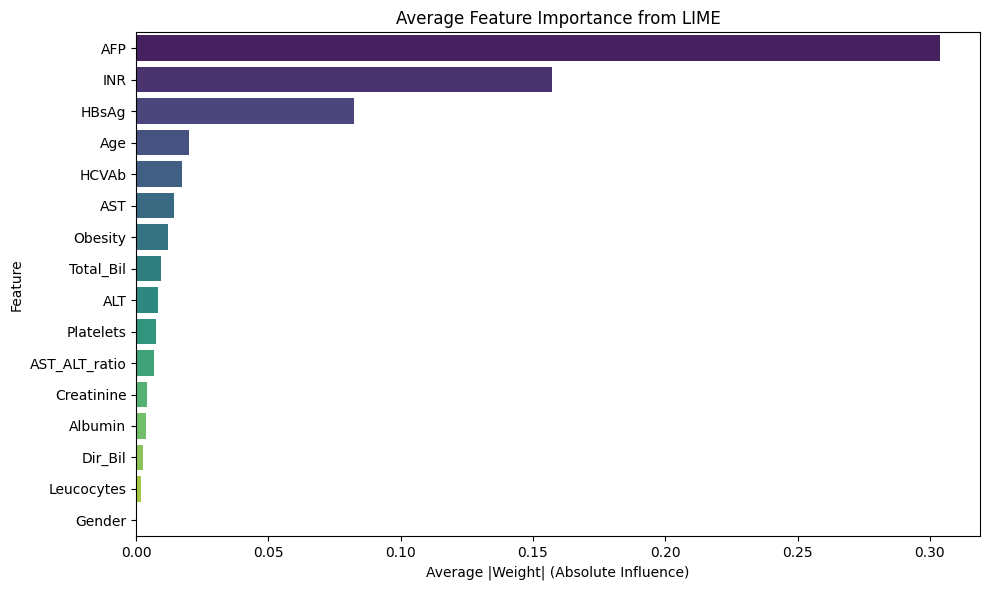

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    y=importance_summary.index,
    x='importance',
    data=importance_summary,
    palette='viridis'
)
plt.title(f'Average Feature Importance from LIME')
plt.xlabel('Average |Weight| (Absolute Influence)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

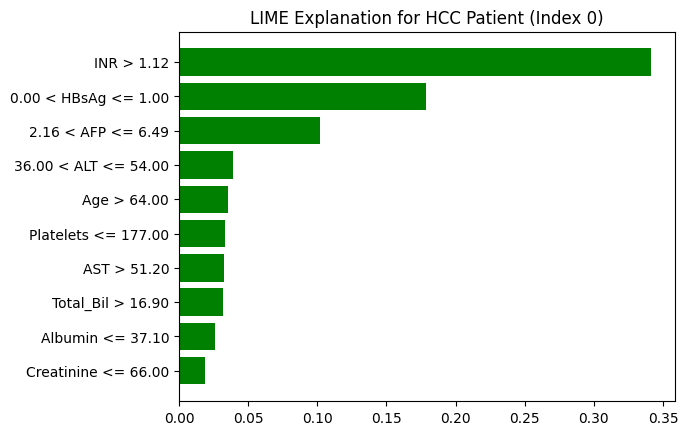

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

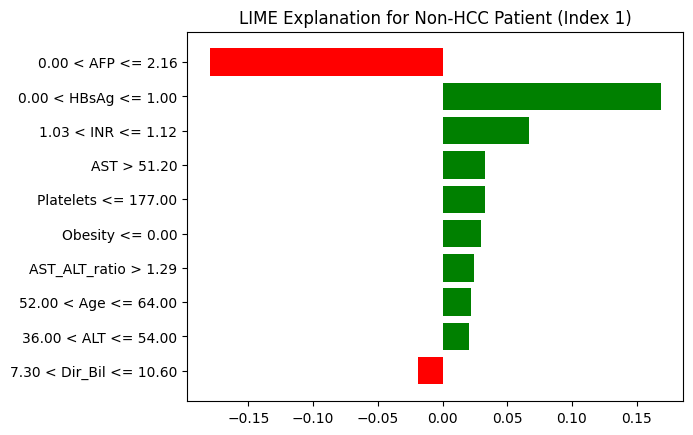

In [15]:
import matplotlib.pyplot as plt

# LIME giải thích cho người HCC (index 0)
exp_hcc = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=model.predict_proba
)

# Vẽ LIME cho HCC
fig_hcc = exp_hcc.as_pyplot_figure()
plt.title("LIME Explanation for HCC Patient (Index 0)")
plt.show()

# LIME giải thích cho người Non-HCC (index 1)
exp_no_hcc = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=model.predict_proba
)

# Vẽ LIME cho Non-HCC
fig_no_hcc = exp_no_hcc.as_pyplot_figure()
plt.title("LIME Explanation for Non-HCC Patient (Index 1)")
plt.show()
